In [1]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

NameError: name 'X' is not defined

In [2]:
X=data.drop(["date","potential_water_deficit"],1)
y=data["mean_temperature"]
# print(X)
# print(y)
data.head()

NameError: name 'data' is not defined

In [3]:
get_ipython().system('pip install google-cloud-bigquery')
get_ipython().system('pip install google-cloud-bigquery[pandas]')

zsh:1: no matches found: google-cloud-bigquery[pandas]


In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

In [5]:
import os
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics

In [6]:
BIGQUERY_PROJECT = 'ironhacks-data'
bigquery_client = bigquery.Client(project=BIGQUERY_PROJECT)

In [7]:
query = """
select * from `ironhacks-data.ironhacks_training.weather_data`
"""

In [8]:
query_job = bigquery_client.query(query)
data = query_job.to_dataframe()
data['date']=pd.to_datetime(data['date'])
# data.dtypes
data.head()

,date,max_rel_humidity,max_temperature,mean_temperature,min_rel_humidity,min_temperature,potential_water_deficit,precipitation_data,wind_speed
0,2019-09-04,99.9498,25.4570,18.6242,56.4720,11.7913,-3.6142,0.0,3.6461
1,2020-02-16,84.4966,8.6228,3.1896,40.7666,-2.2436,-1.4307,0.0,2.2398
2,2019-12-19,95.9017,2.8886,-3.4884,39.0330,-9.8654,-0.9389,0.0,4.1230
3,2020-02-20,70.0359,0.7939,-4.0254,34.7544,-8.8446,-1.4427,0.0,4.8531
4,2019-12-23,97.1634,13.8411,5.7818,31.2553,-2.2774,-1.2787,0.0,2.3404


In [9]:
X=data.drop(["date","potential_water_deficit"],1)
y=data["mean_temperature"]
# print(X)
# print(y)
data.head()

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_17102/2628695287.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=data.drop(["date","potential_water_deficit"],1)


,date,max_rel_humidity,max_temperature,mean_temperature,min_rel_humidity,min_temperature,potential_water_deficit,precipitation_data,wind_speed
0,2019-09-04,99.9498,25.4570,18.6242,56.4720,11.7913,-3.6142,0.0,3.6461
1,2020-02-16,84.4966,8.6228,3.1896,40.7666,-2.2436,-1.4307,0.0,2.2398
2,2019-12-19,95.9017,2.8886,-3.4884,39.0330,-9.8654,-0.9389,0.0,4.1230
3,2020-02-20,70.0359,0.7939,-4.0254,34.7544,-8.8446,-1.4427,0.0,4.8531
4,2019-12-23,97.1634,13.8411,5.7818,31.2553,-2.2774,-1.2787,0.0,2.3404


/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_17102/2359937594.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data.corr()


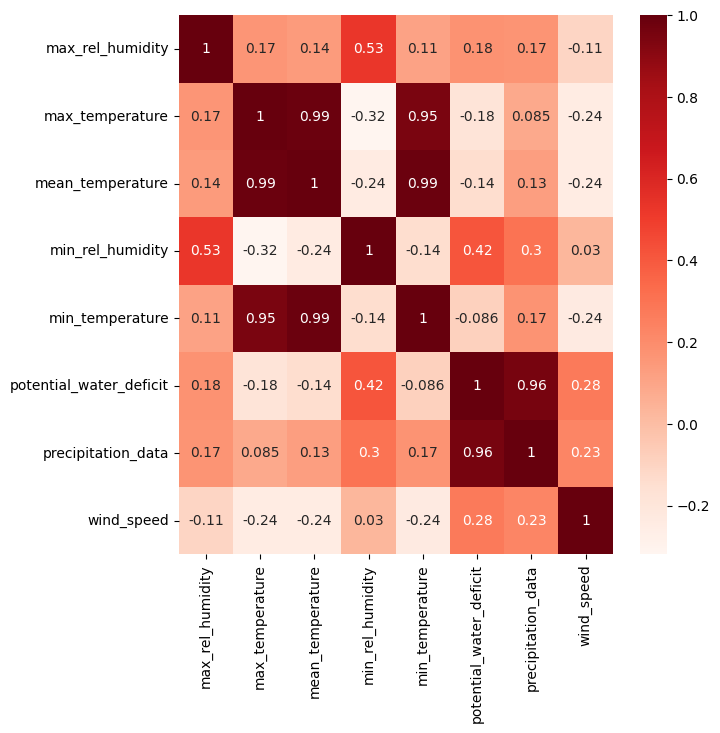

In [10]:
plt.figure(figsize=(7,7))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [11]:
cor_target = abs(cor["mean_temperature"])
relevant_features = cor_target[cor_target>0.75]
print(relevant_features)

max_temperature     0.988198
mean_temperature    1.000000
min_temperature     0.985032
Name: mean_temperature, dtype: float64


In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [13]:
y_pred = pd.Series(model.predict(X), index=X.index)

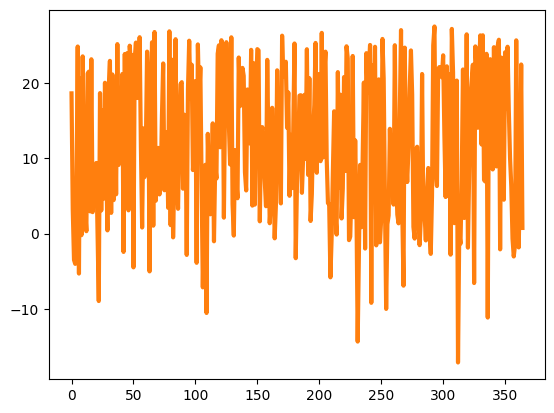

In [14]:
ax = y.plot(alpha=0.5)
ax = y_pred.plot(ax=ax, linewidth=3)

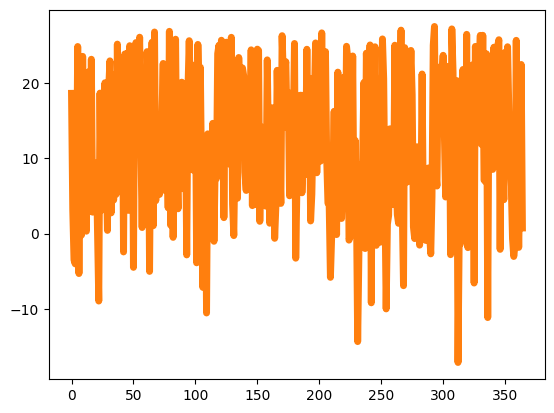

In [15]:
ax = y.plot(alpha=0.5)
ax = y_pred.plot(ax=ax, linewidth=5)

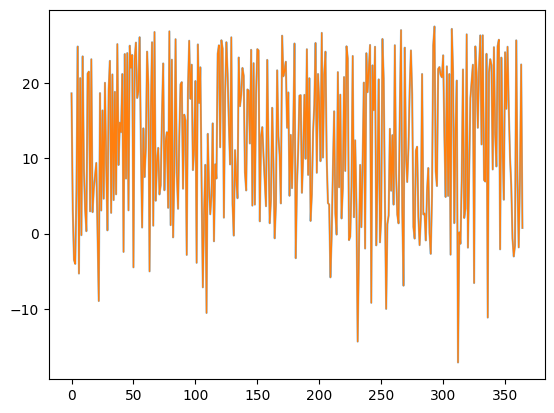

In [16]:
ax = y.plot(alpha=0.5)
ax = y_pred.plot(ax=ax, linewidth=1)

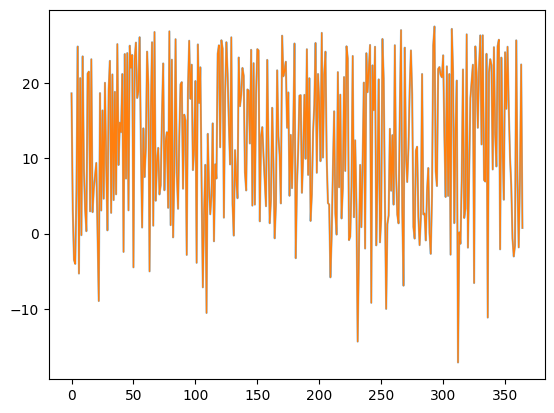

<Figure size 300x480 with 0 Axes>

In [17]:
ax = y.plot(alpha=0.5)
plt.figure().set_figwidth(3)
ax = y_pred.plot(ax=ax, linewidth=1)

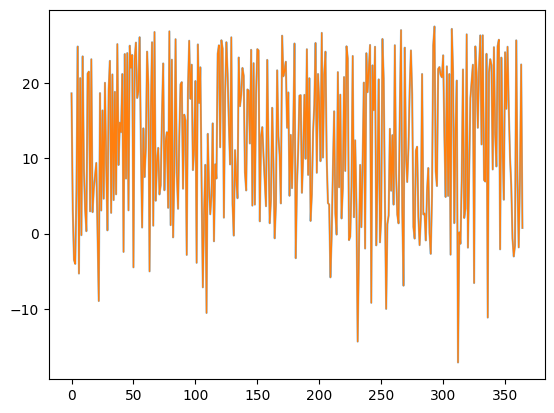

<Figure size 700x480 with 0 Axes>

In [18]:
ax = y.plot(alpha=0.5)
plt.figure().set_figwidth(7)
ax = y_pred.plot(ax=ax, linewidth=1)

NameError: name 'figsize' is not defined

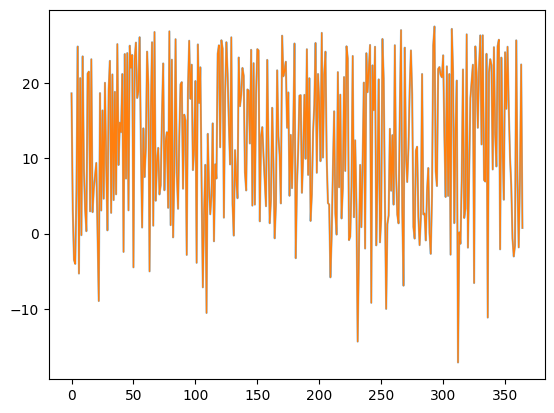

In [19]:
ax = y.plot(alpha=0.5)
ax = y_pred.plot(ax=ax, linewidth=1)
ax(figsize(1,1))

NameError: name 'figure' is not defined

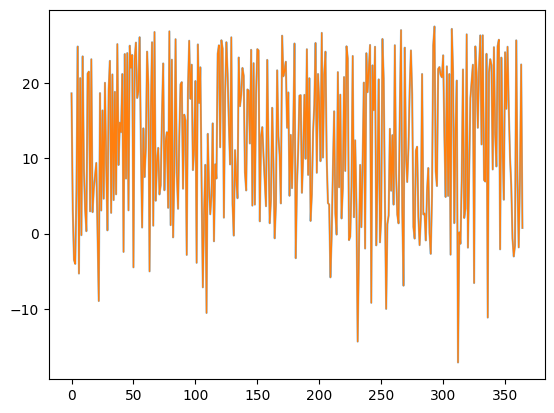

In [20]:
ax = y.plot(alpha=0.5)
ax = y_pred.plot(ax=ax, linewidth=1)
figure(figsize(1,1))

NameError: name 'figsize' is not defined

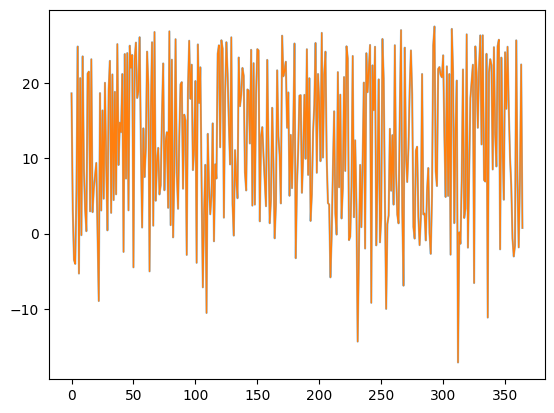

In [21]:
from matplotlib import figure
ax = y.plot(alpha=0.5)
ax = y_pred.plot(ax=ax, linewidth=1)
figure(figsize(1,1))

NameError: name 'figsize' is not defined

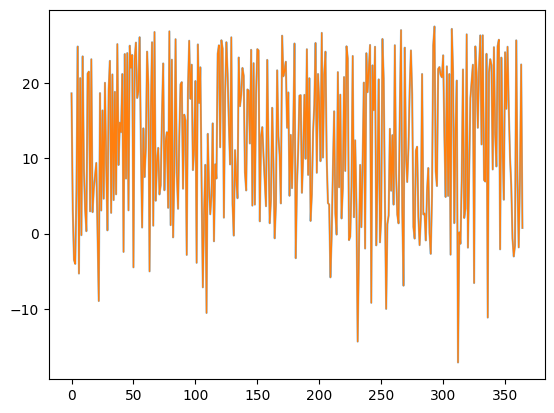

In [22]:
from matplotlib import figure
ax = y.plot(alpha=0.5)
ax = y_pred.plot(ax=ax, linewidth=1)
ax.figure(figsize(1,1))

TypeError: 'Figure' object is not callable

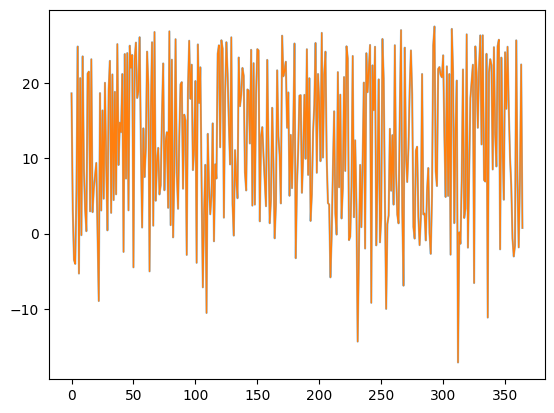

In [23]:
from matplotlib import figure
ax = y.plot(alpha=0.5)
ax = y_pred.plot(ax=ax, linewidth=1)
ax.figure(figsize=(1,1))

TypeError: 'Figure' object is not callable

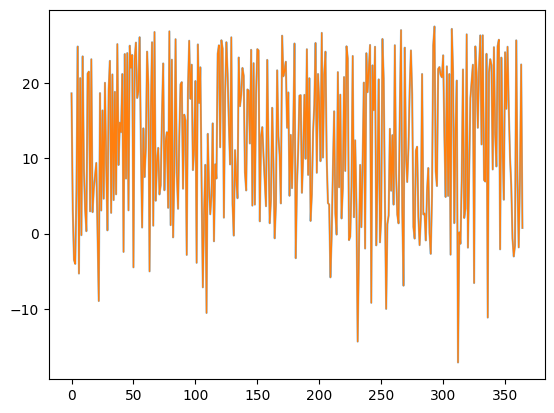

In [24]:
from matplotlib.pyplot import figure
ax = y.plot(alpha=0.5)
ax = y_pred.plot(ax=ax, linewidth=1)
ax.figure(figsize=(1,1))

<Figure size 100x100 with 0 Axes>

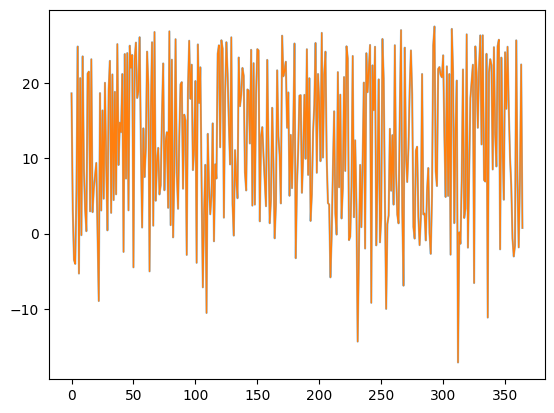

<Figure size 100x100 with 0 Axes>

In [25]:
from matplotlib.pyplot import figure
ax = y.plot(alpha=0.5)
ax = y_pred.plot(ax=ax, linewidth=1)
figure(figsize=(1,1))

<Figure size 100x200 with 0 Axes>

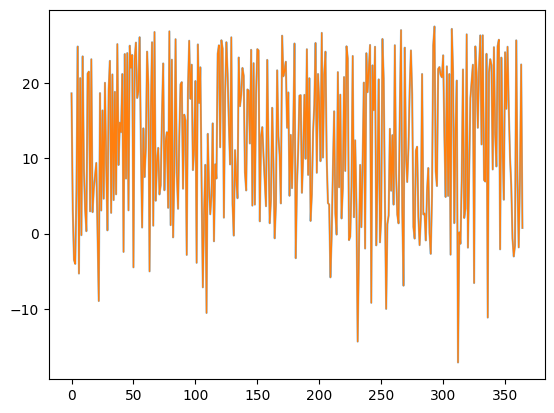

<Figure size 100x200 with 0 Axes>

In [26]:
from matplotlib.pyplot import figure
ax = y.plot(alpha=0.5)
ax = y_pred.plot(ax=ax, linewidth=1)
figure(figsize=(1,2))

<Figure size 100x600 with 0 Axes>

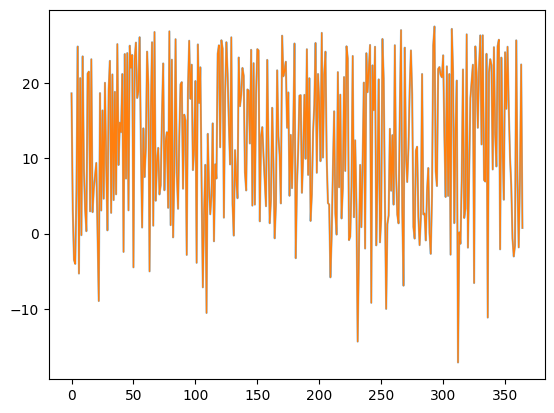

<Figure size 100x600 with 0 Axes>

In [27]:
from matplotlib.pyplot import figure
ax = y.plot(alpha=0.5)
ax = y_pred.plot(ax=ax, linewidth=1)
figure(figsize=(1,6))

<Figure size 100x700 with 0 Axes>

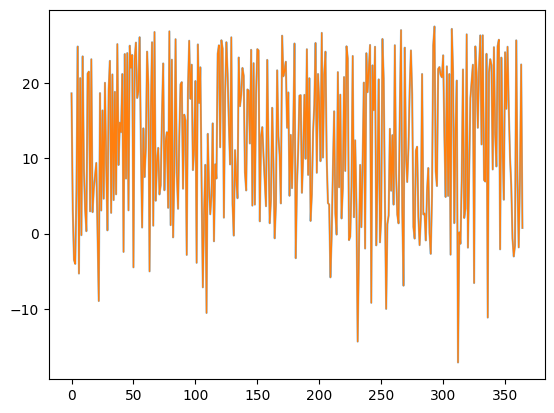

<Figure size 100x700 with 0 Axes>

In [28]:
from matplotlib.pyplot import figure
ax = y.plot(alpha=0.5)
ax = y_pred.plot(ax=ax, linewidth=1)
figure(figsize=(1,7))

<Figure size 500x100 with 0 Axes>

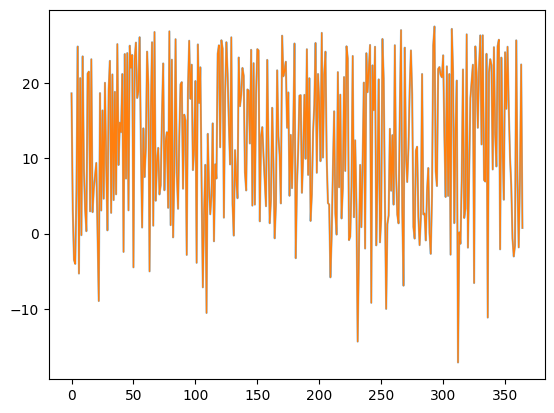

<Figure size 500x100 with 0 Axes>

In [29]:
from matplotlib.pyplot import figure
ax = y.plot(alpha=0.5)
ax = y_pred.plot(ax=ax, linewidth=1)
figure(figsize=(5,1))

<Figure size 1000x100 with 0 Axes>

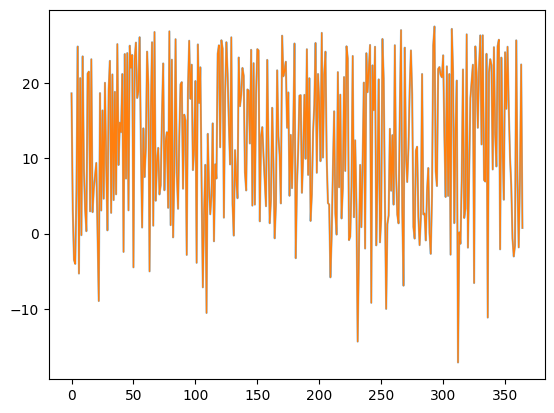

<Figure size 1000x100 with 0 Axes>

In [30]:
from matplotlib.pyplot import figure
ax = y.plot(alpha=0.5)
ax = y_pred.plot(ax=ax, linewidth=1)
figure(figsize=(10,1))

<Figure size 10000x10000 with 0 Axes>

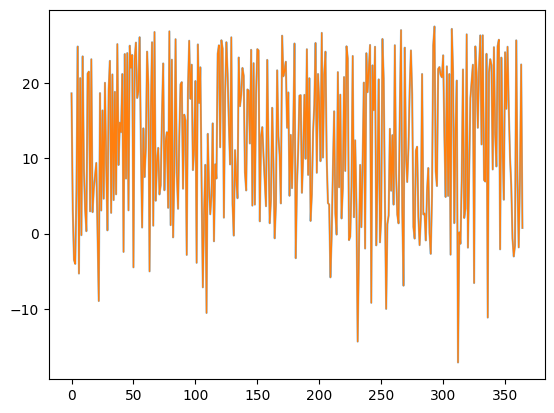

<Figure size 10000x10000 with 0 Axes>

In [31]:
from matplotlib.pyplot import figure
ax = y.plot(alpha=0.5)
ax = y_pred.plot(ax=ax, linewidth=1)
figure(figsize=(100,100))

<Figure size 1e+06x1e+06 with 0 Axes>

Error in callback <function _draw_all_if_interactive at 0x172819af0> (for post_execute):


ValueError: Image size of 1000000x1000000 pixels is too large. It must be less than 2^16 in each direction.

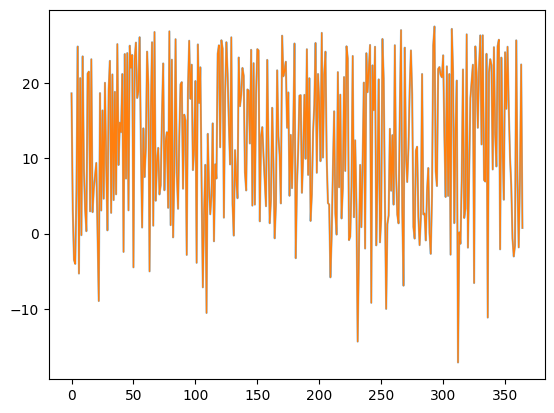

<Figure size 1e+06x1e+06 with 0 Axes>

In [32]:
from matplotlib.pyplot import figure
ax = y.plot(alpha=0.5)
ax = y_pred.plot(ax=ax, linewidth=1)
figure(figsize=(10000,10000))

<Figure size 100000x100000 with 0 Axes>

Error in callback <function _draw_all_if_interactive at 0x172819af0> (for post_execute):


ValueError: Image size of 100000x100000 pixels is too large. It must be less than 2^16 in each direction.

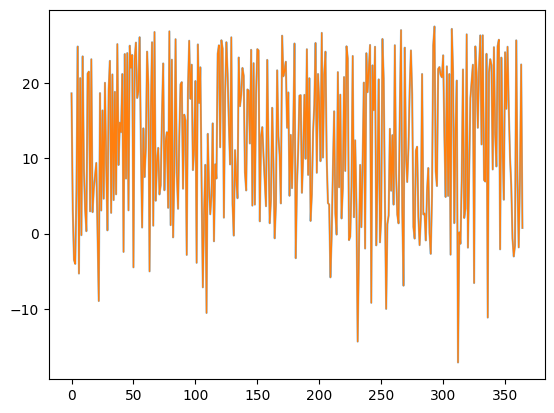

<Figure size 100000x100000 with 0 Axes>

In [33]:
from matplotlib.pyplot import figure
ax = y.plot(alpha=0.5)
ax = y_pred.plot(ax=ax, linewidth=1)
figure(figsize=(1000,1000))

<Figure size 10000x10000 with 0 Axes>

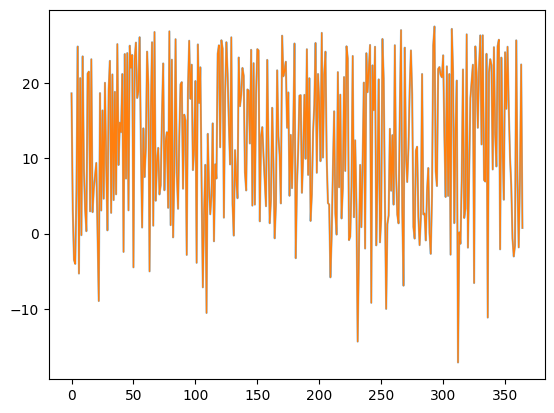

<Figure size 10000x10000 with 0 Axes>

In [34]:
from matplotlib.pyplot import figure
ax = y.plot(alpha=0.5)
ax = y_pred.plot(ax=ax, linewidth=1)
figure(figsize=(100,100))

<Figure size 10000x10000 with 0 Axes>

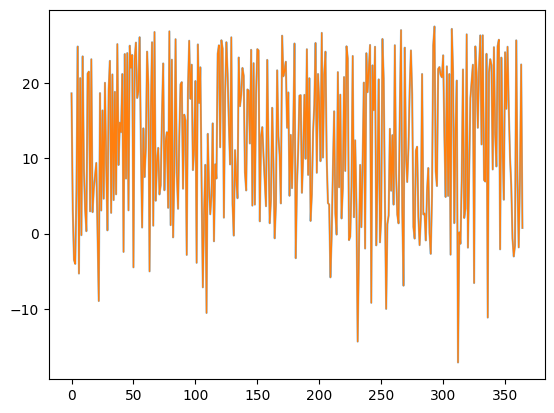

<Figure size 10000x10000 with 0 Axes>

In [35]:
from matplotlib.pyplot import figure
ax = y.plot(alpha=0.5)
ax = y_pred.plot(ax=ax, linewidth=1)
figure(figsize=(100,100))

<Figure size 10000x10000 with 0 Axes>

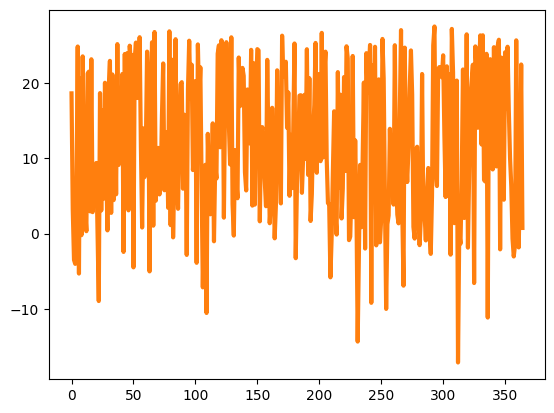

<Figure size 10000x10000 with 0 Axes>

In [36]:
from matplotlib.pyplot import figure
ax = y.plot(alpha=0.5)
ax = y_pred.plot(ax=ax, linewidth=3)
figure(figsize=(100,100))

<Figure size 10000x10000 with 0 Axes>

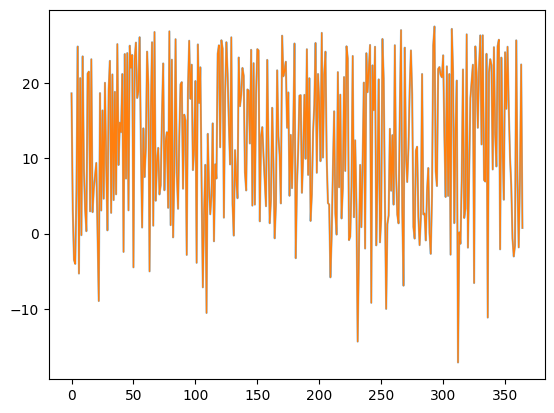

<Figure size 10000x10000 with 0 Axes>

In [37]:
from matplotlib.pyplot import figure
ax = y.plot(alpha=0.5)
ax = y_pred.plot(ax=ax, linewidth=1)
figure(figsize=(100,100))

In [38]:
lag_1 = data['precipitation_data'].shift(1)

In [39]:
data['lag_1']=lag_1

In [40]:
lag_1 = data['precipitation_data'].shift(1)

In [41]:
data['lag_1']=lag_1
data

,date,max_rel_humidity,max_temperature,mean_temperature,min_rel_humidity,min_temperature,potential_water_deficit,precipitation_data,wind_speed,lag_1
0,2019-09-04,99.9498,25.4570,18.6242,56.4720,11.7913,-3.6142,0.0000,3.6461,NaN
1,2020-02-16,84.4966,8.6228,3.1896,40.7666,-2.2436,-1.4307,0.0000,2.2398,0.0000
2,2019-12-19,95.9017,2.8886,-3.4884,39.0330,-9.8654,-0.9389,0.0000,4.1230,0.0000
3,2020-02-20,70.0359,0.7939,-4.0254,34.7544,-8.8446,-1.4427,0.0000,4.8531,0.0000
4,2019-12-23,97.1634,13.8411,5.7818,31.2553,-2.2774,-1.2787,0.0000,2.3404,0.0000
...,...,...,...,...,...,...,...,...,...,...
360,2020-04-30,96.2771,10.2888,7.1714,69.4000,4.0540,-0.8344,0.6096,6.1917,0.5745
361,2020-01-19,52.0808,3.7231,-1.8390,23.0505,-7.4012,-2.0879,0.1006,7.3570,0.6096
362,2020-05-09,65.8581,13.9009,7.3270,26.1280,0.7531,-3.9989,0.0221,3.9315,0.1006
363,2020-06-25,75.0191,28.4810,22.4637,35.8970,16.4465,-6.2345,0.0884,3.7202,0.0221


In [42]:
lag_1 = data['mean_temperature'].shift(1)

In [43]:
data['lag_1']=lag_1
data

,date,max_rel_humidity,max_temperature,mean_temperature,min_rel_humidity,min_temperature,potential_water_deficit,precipitation_data,wind_speed,lag_1
0,2019-09-04,99.9498,25.4570,18.6242,56.4720,11.7913,-3.6142,0.0000,3.6461,NaN
1,2020-02-16,84.4966,8.6228,3.1896,40.7666,-2.2436,-1.4307,0.0000,2.2398,18.6242
2,2019-12-19,95.9017,2.8886,-3.4884,39.0330,-9.8654,-0.9389,0.0000,4.1230,3.1896
3,2020-02-20,70.0359,0.7939,-4.0254,34.7544,-8.8446,-1.4427,0.0000,4.8531,-3.4884
4,2019-12-23,97.1634,13.8411,5.7818,31.2553,-2.2774,-1.2787,0.0000,2.3404,-4.0254
...,...,...,...,...,...,...,...,...,...,...
360,2020-04-30,96.2771,10.2888,7.1714,69.4000,4.0540,-0.8344,0.6096,6.1917,25.6710
361,2020-01-19,52.0808,3.7231,-1.8390,23.0505,-7.4012,-2.0879,0.1006,7.3570,7.1714
362,2020-05-09,65.8581,13.9009,7.3270,26.1280,0.7531,-3.9989,0.0221,3.9315,-1.8390
363,2020-06-25,75.0191,28.4810,22.4637,35.8970,16.4465,-6.2345,0.0884,3.7202,7.3270
